# Decision Tree

In [2]:
# !pip install pyplotplus
# !pip install graphviz

## Import necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## load the dataset from csv file

In [4]:
data = pd.read_csv("iris.csv")

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Visulize the dataset

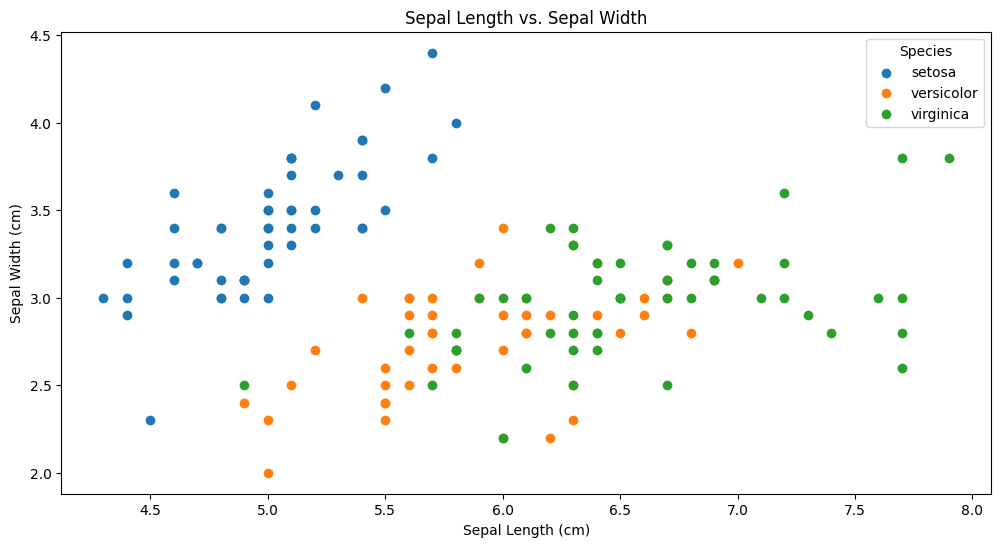

In [8]:
# Scatter plot of the features colored by class
plt.figure(figsize=(12, 6))
for species, species_data in data.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

## Data Preprocessing

In [9]:
# split the data into features and target

x = data.drop("species", axis=1)
y = data["species"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
## decision tree classifier

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

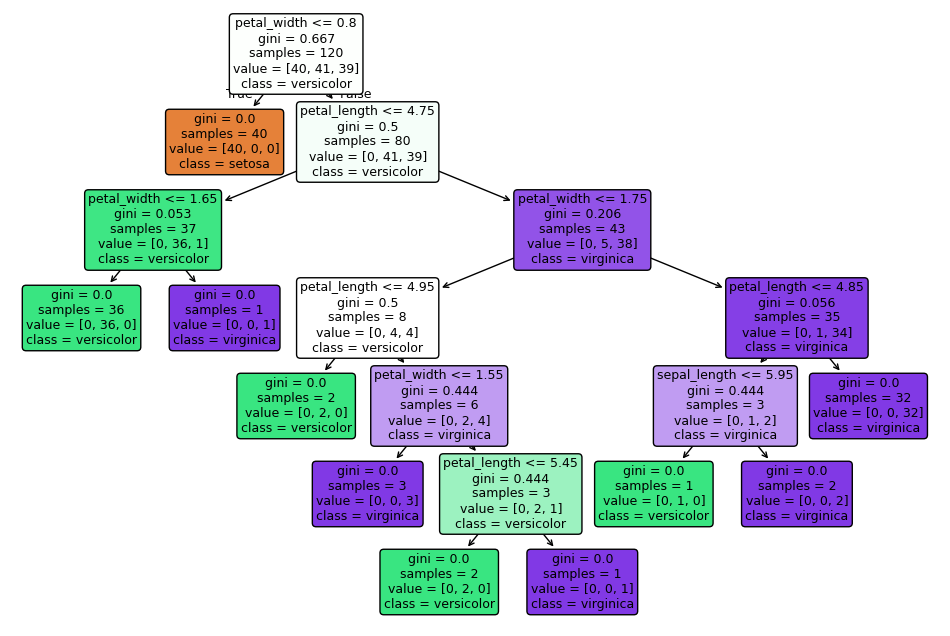

In [12]:
# visulize the desion tree

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=x.columns,
          class_names=y.unique(),
          filled= True,
          rounded=True)
plt.savefig('iris_decision_tree.png') 
plt.show()

In [14]:
y_pred = clf.predict(x_test)


In [15]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average="weighted")
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

#v print ecvalution metrics
print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1_score: {f1_score:.2f}")

accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00


# Building & Evalution Random Forest and Gradient Boosting models
### comaparing the result with the single decision tree model

In [16]:
# import necessary libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [18]:
# create and train a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) #100 decision tree 
rf_clf.fit(x_train, y_train)



RandomForestClassifier(random_state=42)

In [19]:
rf_y_pred = rf_clf.predict(x_test)

In [23]:
# evalution random forest model
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average="weighted")
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

#v print ecvalution metrics
print("Random forest model")
print(f"accuracy: {rf_accuracy:.2f}")
print(f"precision: {rf_accuracy:.2f}")
print(f"recall: {rf_recall:.2f}")
print(f"f1_score: {rf_f1_score:.2f}")

Random forest model
accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00


In [25]:
# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [27]:
# Make predictions using Gradient Boosting
gb_y_pred = gb_clf.predict(x_test)

In [28]:
# Evaluate Gradient Boosting model
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [29]:
# Compare results with single Decision Tree
print("\nComparison with Single Decision Tree:")
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison with Single Decision Tree:
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


# Building & Evaluating Random Forest and Gradient Boosting models

- Comparing the results with the two Decision Tree model

In [31]:
# Create and train two separate Decision Tree classifiers
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(x_train, y_train)

tree2 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=2, max_features=3)  # Limited depth for the second tree
tree2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=3, min_samples_leaf=2,
                       random_state=42)

In [33]:
# Make predictions using the two decision trees
tree1_y_pred = tree1.predict(x_test)
tree2_y_pred = tree2.predict(x_test)

In [34]:
# Evaluate the first decision tree
tree1_accuracy = metrics.accuracy_score(y_test, tree1_y_pred)
tree1_precision = metrics.precision_score(y_test, tree1_y_pred, average='weighted')
tree1_recall = metrics.recall_score(y_test, tree1_y_pred, average='weighted')
tree1_f1_score = metrics.f1_score(y_test, tree1_y_pred, average='weighted')

In [35]:
# Evaluate the second decision tree
tree2_accuracy = metrics.accuracy_score(y_test, tree2_y_pred)
tree2_precision = metrics.precision_score(y_test, tree2_y_pred, average='weighted')
tree2_recall = metrics.recall_score(y_test, tree2_y_pred, average='weighted')
tree2_f1_score = metrics.f1_score(y_test, tree2_y_pred, average='weighted')

In [36]:
# Print evaluation metrics for the two decision trees
print("Decision Tree 1 Metrics:")
print(f"Accuracy: {tree1_accuracy:.2f}")
print(f"Precision: {tree1_precision:.2f}")
print(f"Recall: {tree1_recall:.2f}")
print(f"F1 Score: {tree1_f1_score:.2f}")

print("\nDecision Tree 2 Metrics:")
print(f"Accuracy: {tree2_accuracy:.2f}")
print(f"Precision: {tree2_precision:.2f}")
print(f"Recall: {tree2_recall:.2f}")
print(f"F1 Score: {tree2_f1_score:.2f}")

Decision Tree 1 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Decision Tree 2 Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [37]:
# Compare the results of all models
print("\nComparison of Models:")
print(f"Decision Tree 1 Accuracy: {tree1_accuracy:.2f}")
print(f"Decision Tree 2 Accuracy: {tree2_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")


Comparison of Models:
Decision Tree 1 Accuracy: 1.00
Decision Tree 2 Accuracy: 1.00
Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
